# Lab

## Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.family'] = 'Avenir'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.size'] = 10
plt.rcParams['figure.dpi'] = 300

In [3]:
IMG_EXPORT_CONFIG = {
    'dpi': 500,
    'bbox_inches': 'tight',
    'pad_inches': 0.15,
}

## Code

### Numpy

In [4]:
x = np.array([3, 4, 5])
y = np.array([4, 9, 7])
x + y

array([ 7, 13, 12])

In [5]:
x_2d = np.array([[1, 2], [3, 4]])
x_2d.ndim

2

In [6]:
x.dtype, x_2d.dtype

(dtype('int64'), dtype('int64'))

In [7]:
np.sum(x), np.sum(x_2d)

(12, 10)

In [8]:
x = np.array([1, 2, 3, 4, 5, 6])
x_reshape = x.reshape((2, 3))
x_reshape

array([[1, 2, 3],
       [4, 5, 6]])

In [9]:
x_reshape[0, 0]

1

In [10]:
x_reshape.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [11]:
np.round(np.sqrt(x), 2), np.round(np.sqrt(x_reshape), 4)

(array([1.  , 1.41, 1.73, 2.  , 2.24, 2.45]),
 array([[1.    , 1.4142, 1.7321],
        [2.    , 2.2361, 2.4495]]))

In [12]:
x**2, x_reshape**2

(array([ 1,  4,  9, 16, 25, 36]),
 array([[ 1,  4,  9],
        [16, 25, 36]]))

In [13]:
x = np.round(np.random.normal(size=50), 2)
x

array([ 0.15, -1.07,  2.06, -0.01, -0.48,  0.33,  1.75,  0.01, -0.12,
        0.91, -0.63, -0.1 , -0.93, -0.32, -0.23,  0.53, -0.85, -0.64,
        0.76,  0.51,  0.57,  0.69, -0.5 , -0.06, -0.9 ,  1.56,  0.22,
        1.98, -0.65,  0.5 ,  0.54,  1.36, -0.91, -0.76, -1.6 , -0.23,
        0.93,  0.56,  0.04, -0.5 ,  0.87, -1.05,  1.6 ,  0.05, -2.83,
        0.91, -0.28, -0.82,  2.37,  0.42])

In [14]:
y = np.round(np.random.normal(loc=50, scale=1, size=50), 2)

In [15]:
# correlation matrix between x and y
np.corrcoef(x, x+y)

array([[1.        , 0.64824492],
       [0.64824492, 1.        ]])

In [16]:
# rng = random number generator
# use `default_rng` to ensure reproducibility
rng = np.random.default_rng(seed=42)
# normal (Gaussian) distribution
rng.normal(scale=5, size=2)

array([ 1.5235854 , -5.19992053])

In [17]:
# standard normal distribution
rng.standard_normal(size=10)

array([ 0.7504512 ,  0.94056472, -1.95103519, -1.30217951,  0.1278404 ,
       -0.31624259, -0.01680116, -0.85304393,  0.87939797,  0.77779194])

In [18]:
y = np.round(rng.standard_normal(size=10), 2)

In [19]:
np.mean(y), y.mean()

(0.018999999999999982, 0.018999999999999982)

In [20]:
np.var(y), y.var(), np.mean((y - y.mean())**2)

(0.45688900000000005, 0.45688900000000005, 0.45688900000000005)

In [21]:
np.sqrt(y.var()), y.std()

(0.6759356478245544, 0.6759356478245544)

In [22]:
x = rng.standard_normal((10, 3))
x

array([[ 1.22254134, -0.15452948, -0.42832782],
       [-0.35213355,  0.53230919,  0.36544406],
       [ 0.41273261,  0.430821  ,  2.1416476 ],
       [-0.40641502, -0.51224273, -0.81377273],
       [ 0.61597942,  1.12897229, -0.11394746],
       [-0.84015648, -0.82448122,  0.65059279],
       [ 0.74325417,  0.54315427, -0.66550971],
       [ 0.23216132,  0.11668581,  0.2186886 ],
       [ 0.87142878,  0.22359555,  0.67891356],
       [ 0.06757907,  0.2891194 ,  0.63128823]])

In [23]:
x.mean(axis=0), x.mean(axis=1)

(array([0.25669717, 0.17734041, 0.26650171]),
 array([ 0.21322801,  0.18187323,  0.99506707, -0.57747682,  0.54366809,
        -0.33801497,  0.20696624,  0.18917858,  0.59131263,  0.3293289 ]))

In [24]:
np.linspace(-np.pi, np.pi, 50)

array([-3.14159265, -3.01336438, -2.88513611, -2.75690784, -2.62867957,
       -2.5004513 , -2.37222302, -2.24399475, -2.11576648, -1.98753821,
       -1.85930994, -1.73108167, -1.60285339, -1.47462512, -1.34639685,
       -1.21816858, -1.08994031, -0.96171204, -0.83348377, -0.70525549,
       -0.57702722, -0.44879895, -0.32057068, -0.19234241, -0.06411414,
        0.06411414,  0.19234241,  0.32057068,  0.44879895,  0.57702722,
        0.70525549,  0.83348377,  0.96171204,  1.08994031,  1.21816858,
        1.34639685,  1.47462512,  1.60285339,  1.73108167,  1.85930994,
        1.98753821,  2.11576648,  2.24399475,  2.37222302,  2.5004513 ,
        2.62867957,  2.75690784,  2.88513611,  3.01336438,  3.14159265])

### Graph

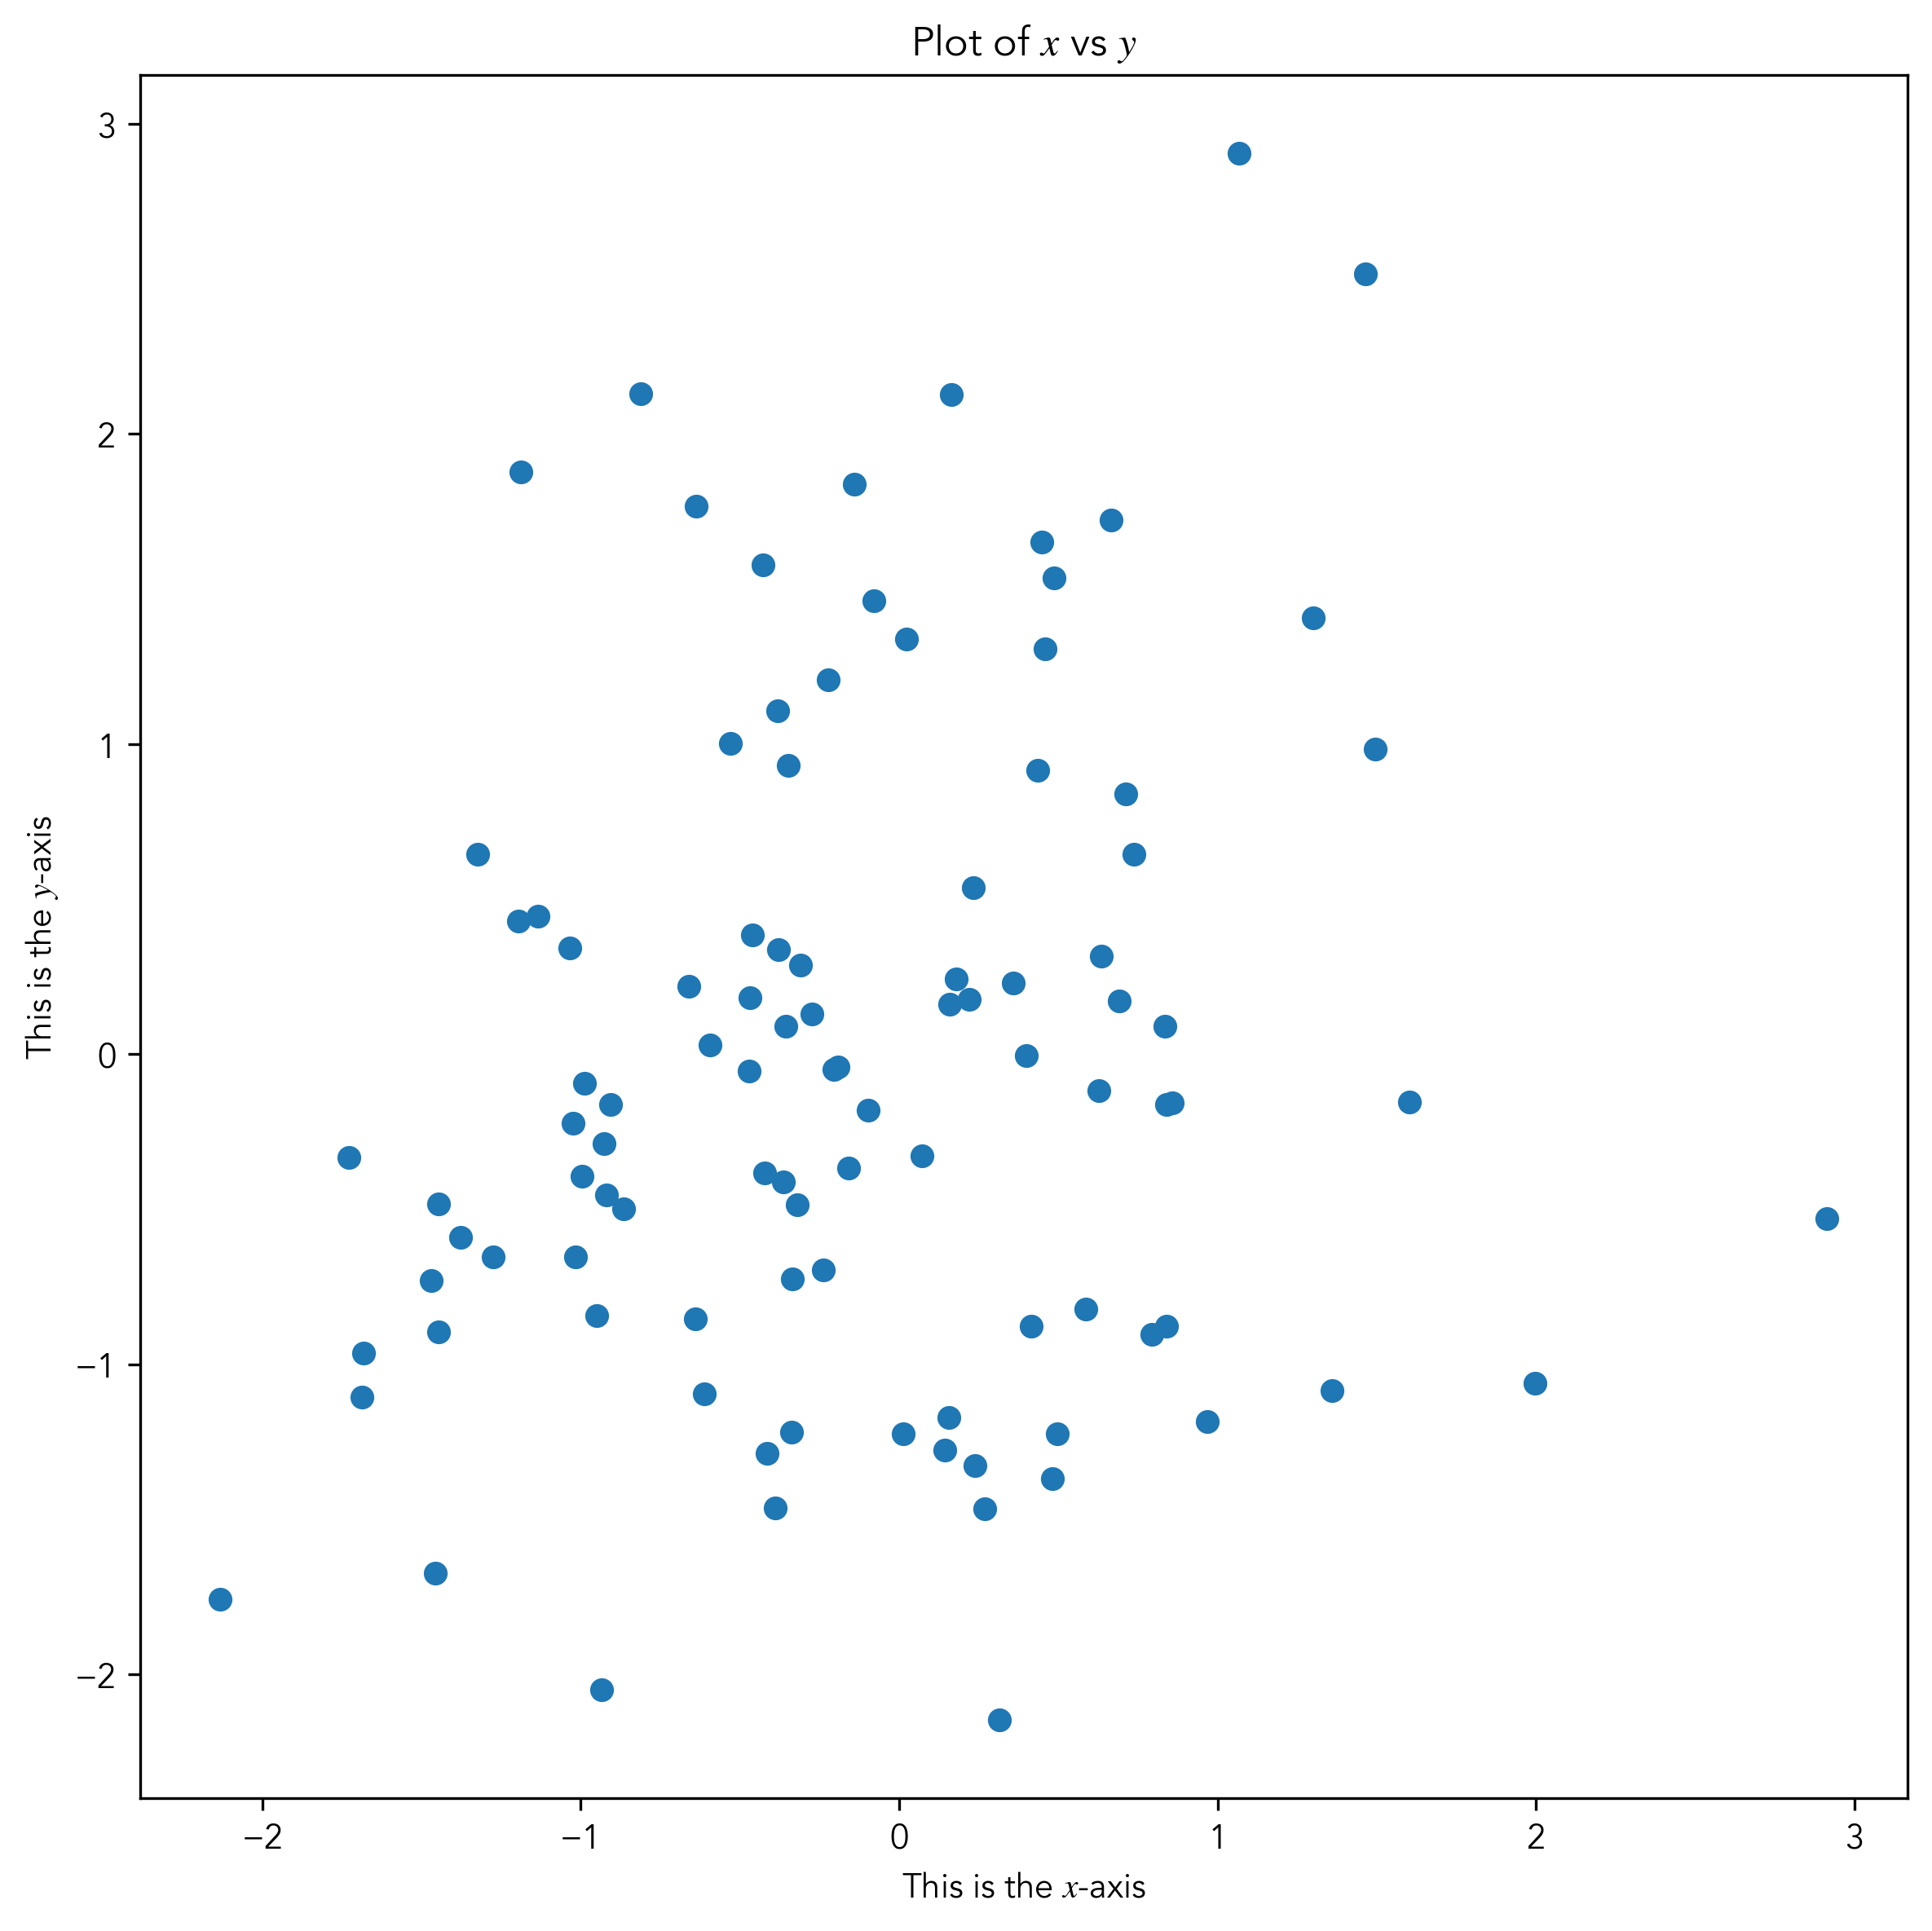

In [25]:
fig, ax = plt.subplots(figsize=(8, 8))
x = rng.standard_normal(size=100)
y = rng.standard_normal(size=100)
# fig.set_size_inches(12, 3)
ax.scatter(x, y, marker='o')
ax.set_xlabel('This is the $x$-axis')
ax.set_ylabel('This is the $y$-axis')
ax.set_title('Plot of $x$ vs $y$')
fig.tight_layout()

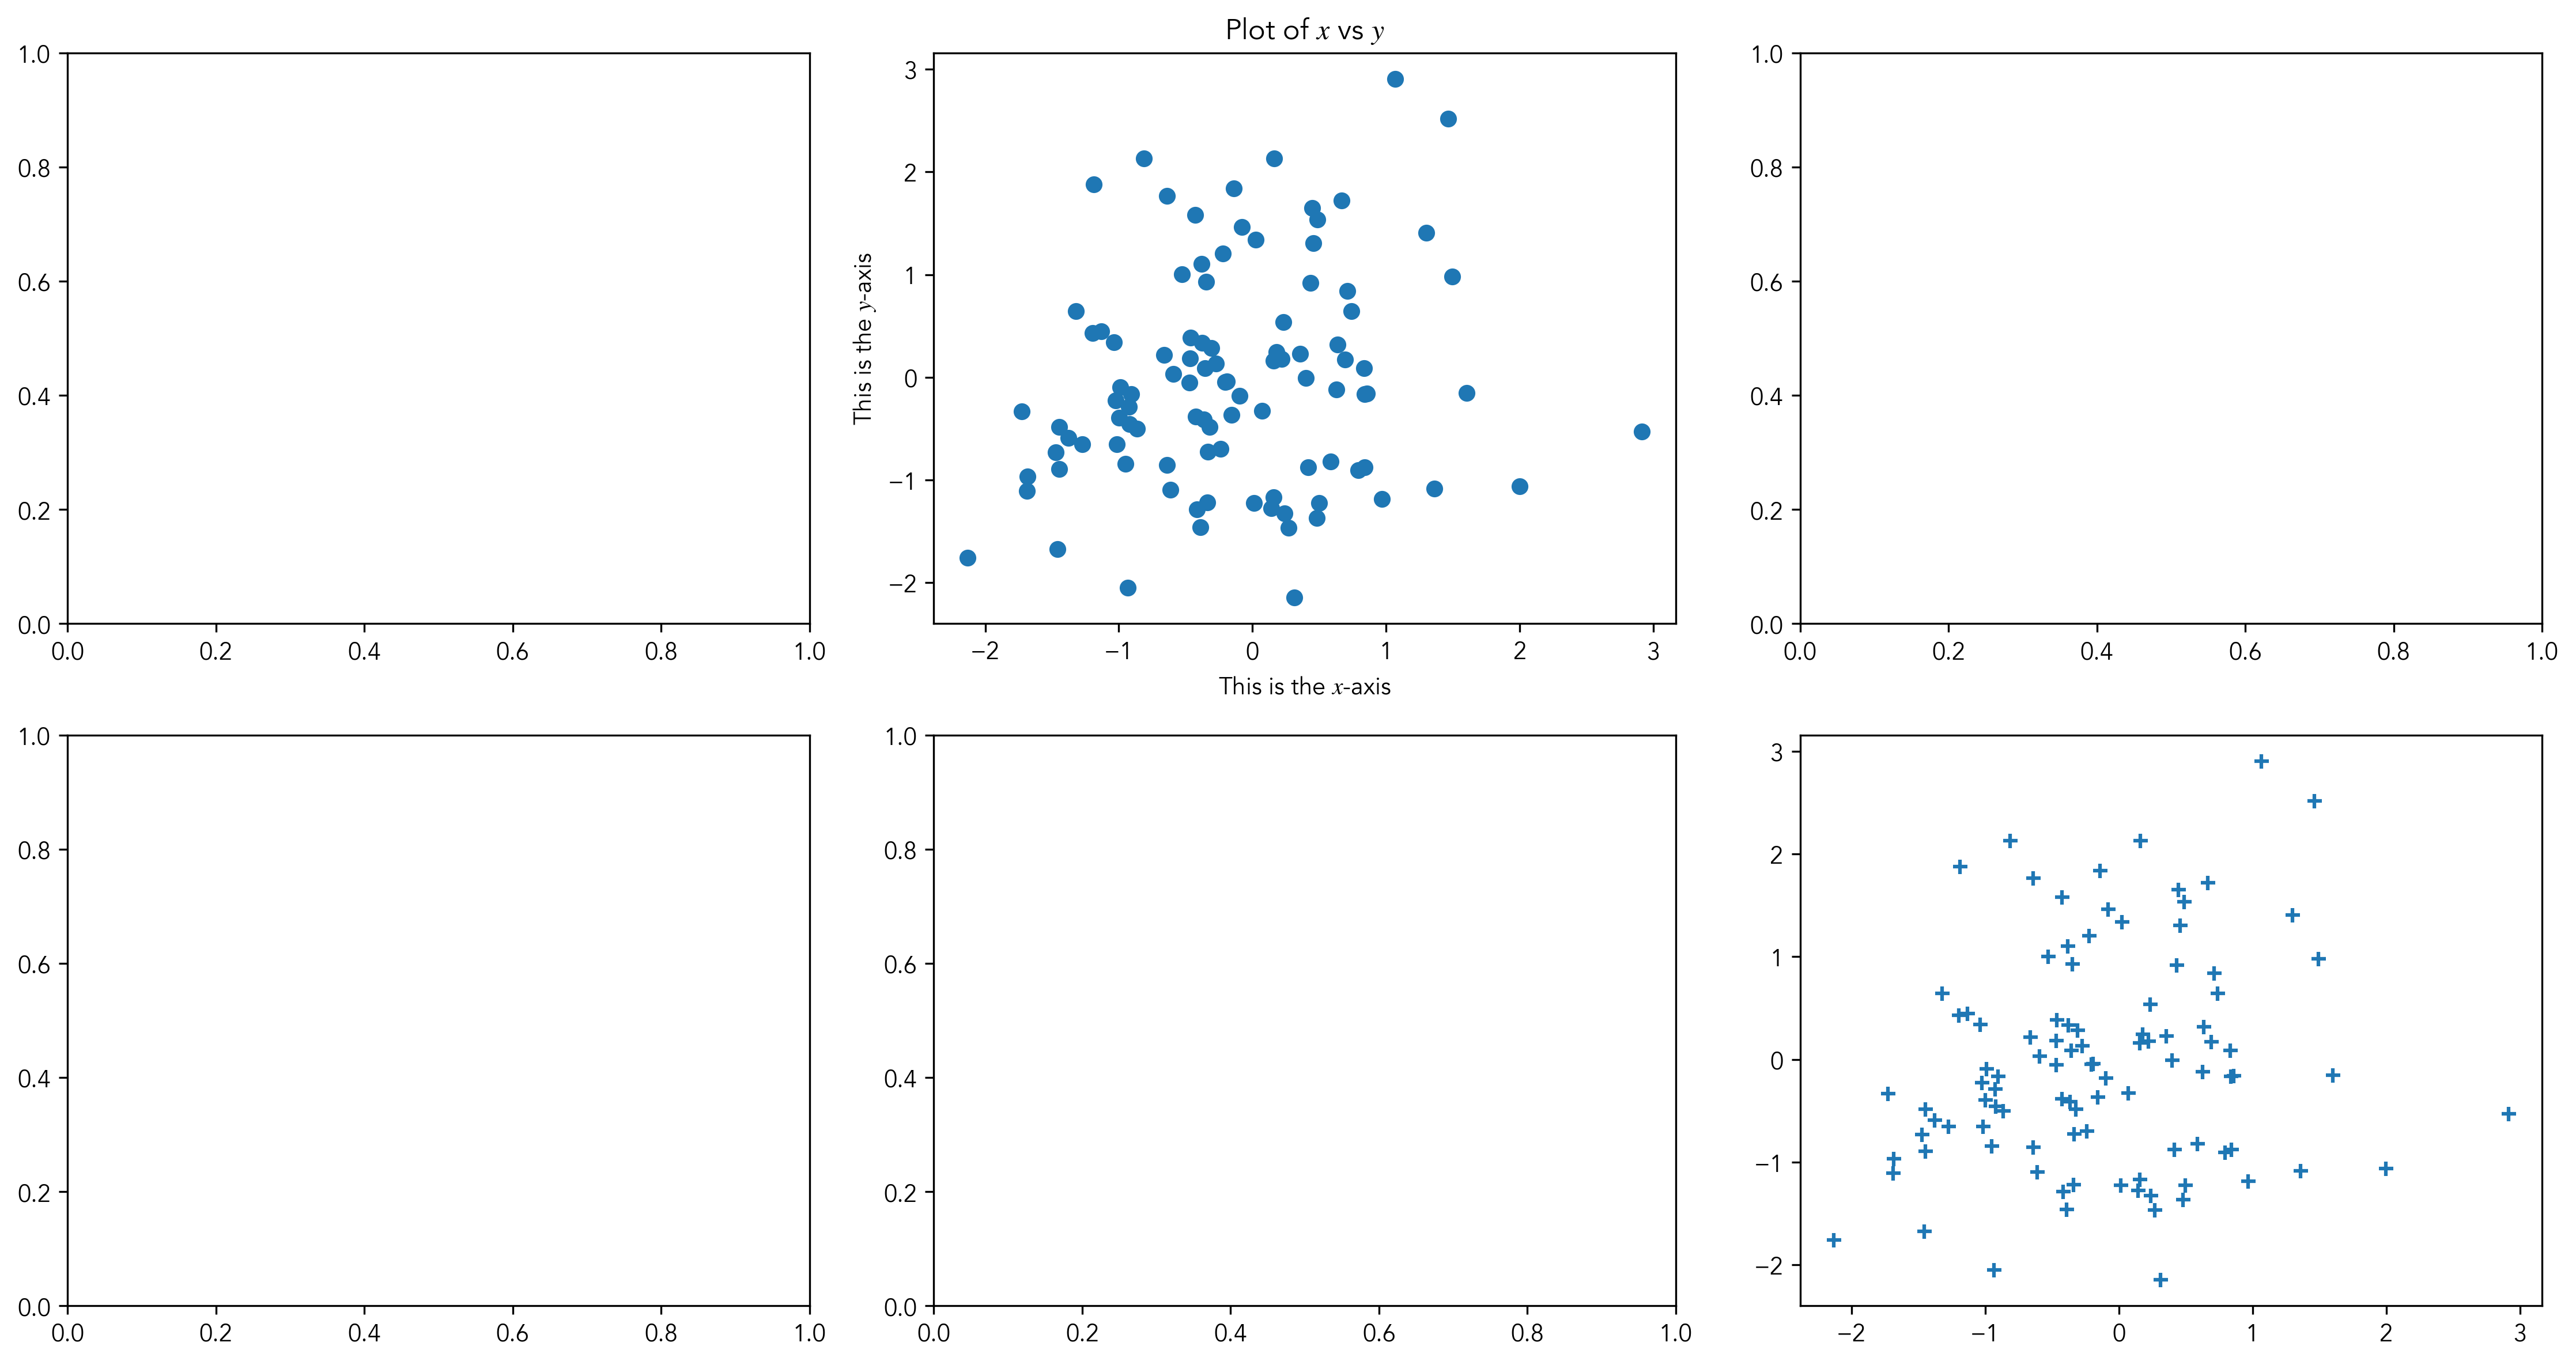

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes[0, 1].scatter(x, y, marker='o')
axes[1, 2].scatter(x, y, marker='+')
axes[0, 1].set_xlabel('This is the $x$-axis')
axes[0, 1].set_ylabel('This is the $y$-axis')
axes[0, 1].set_title('Plot of $x$ vs $y$')
fig.tight_layout()

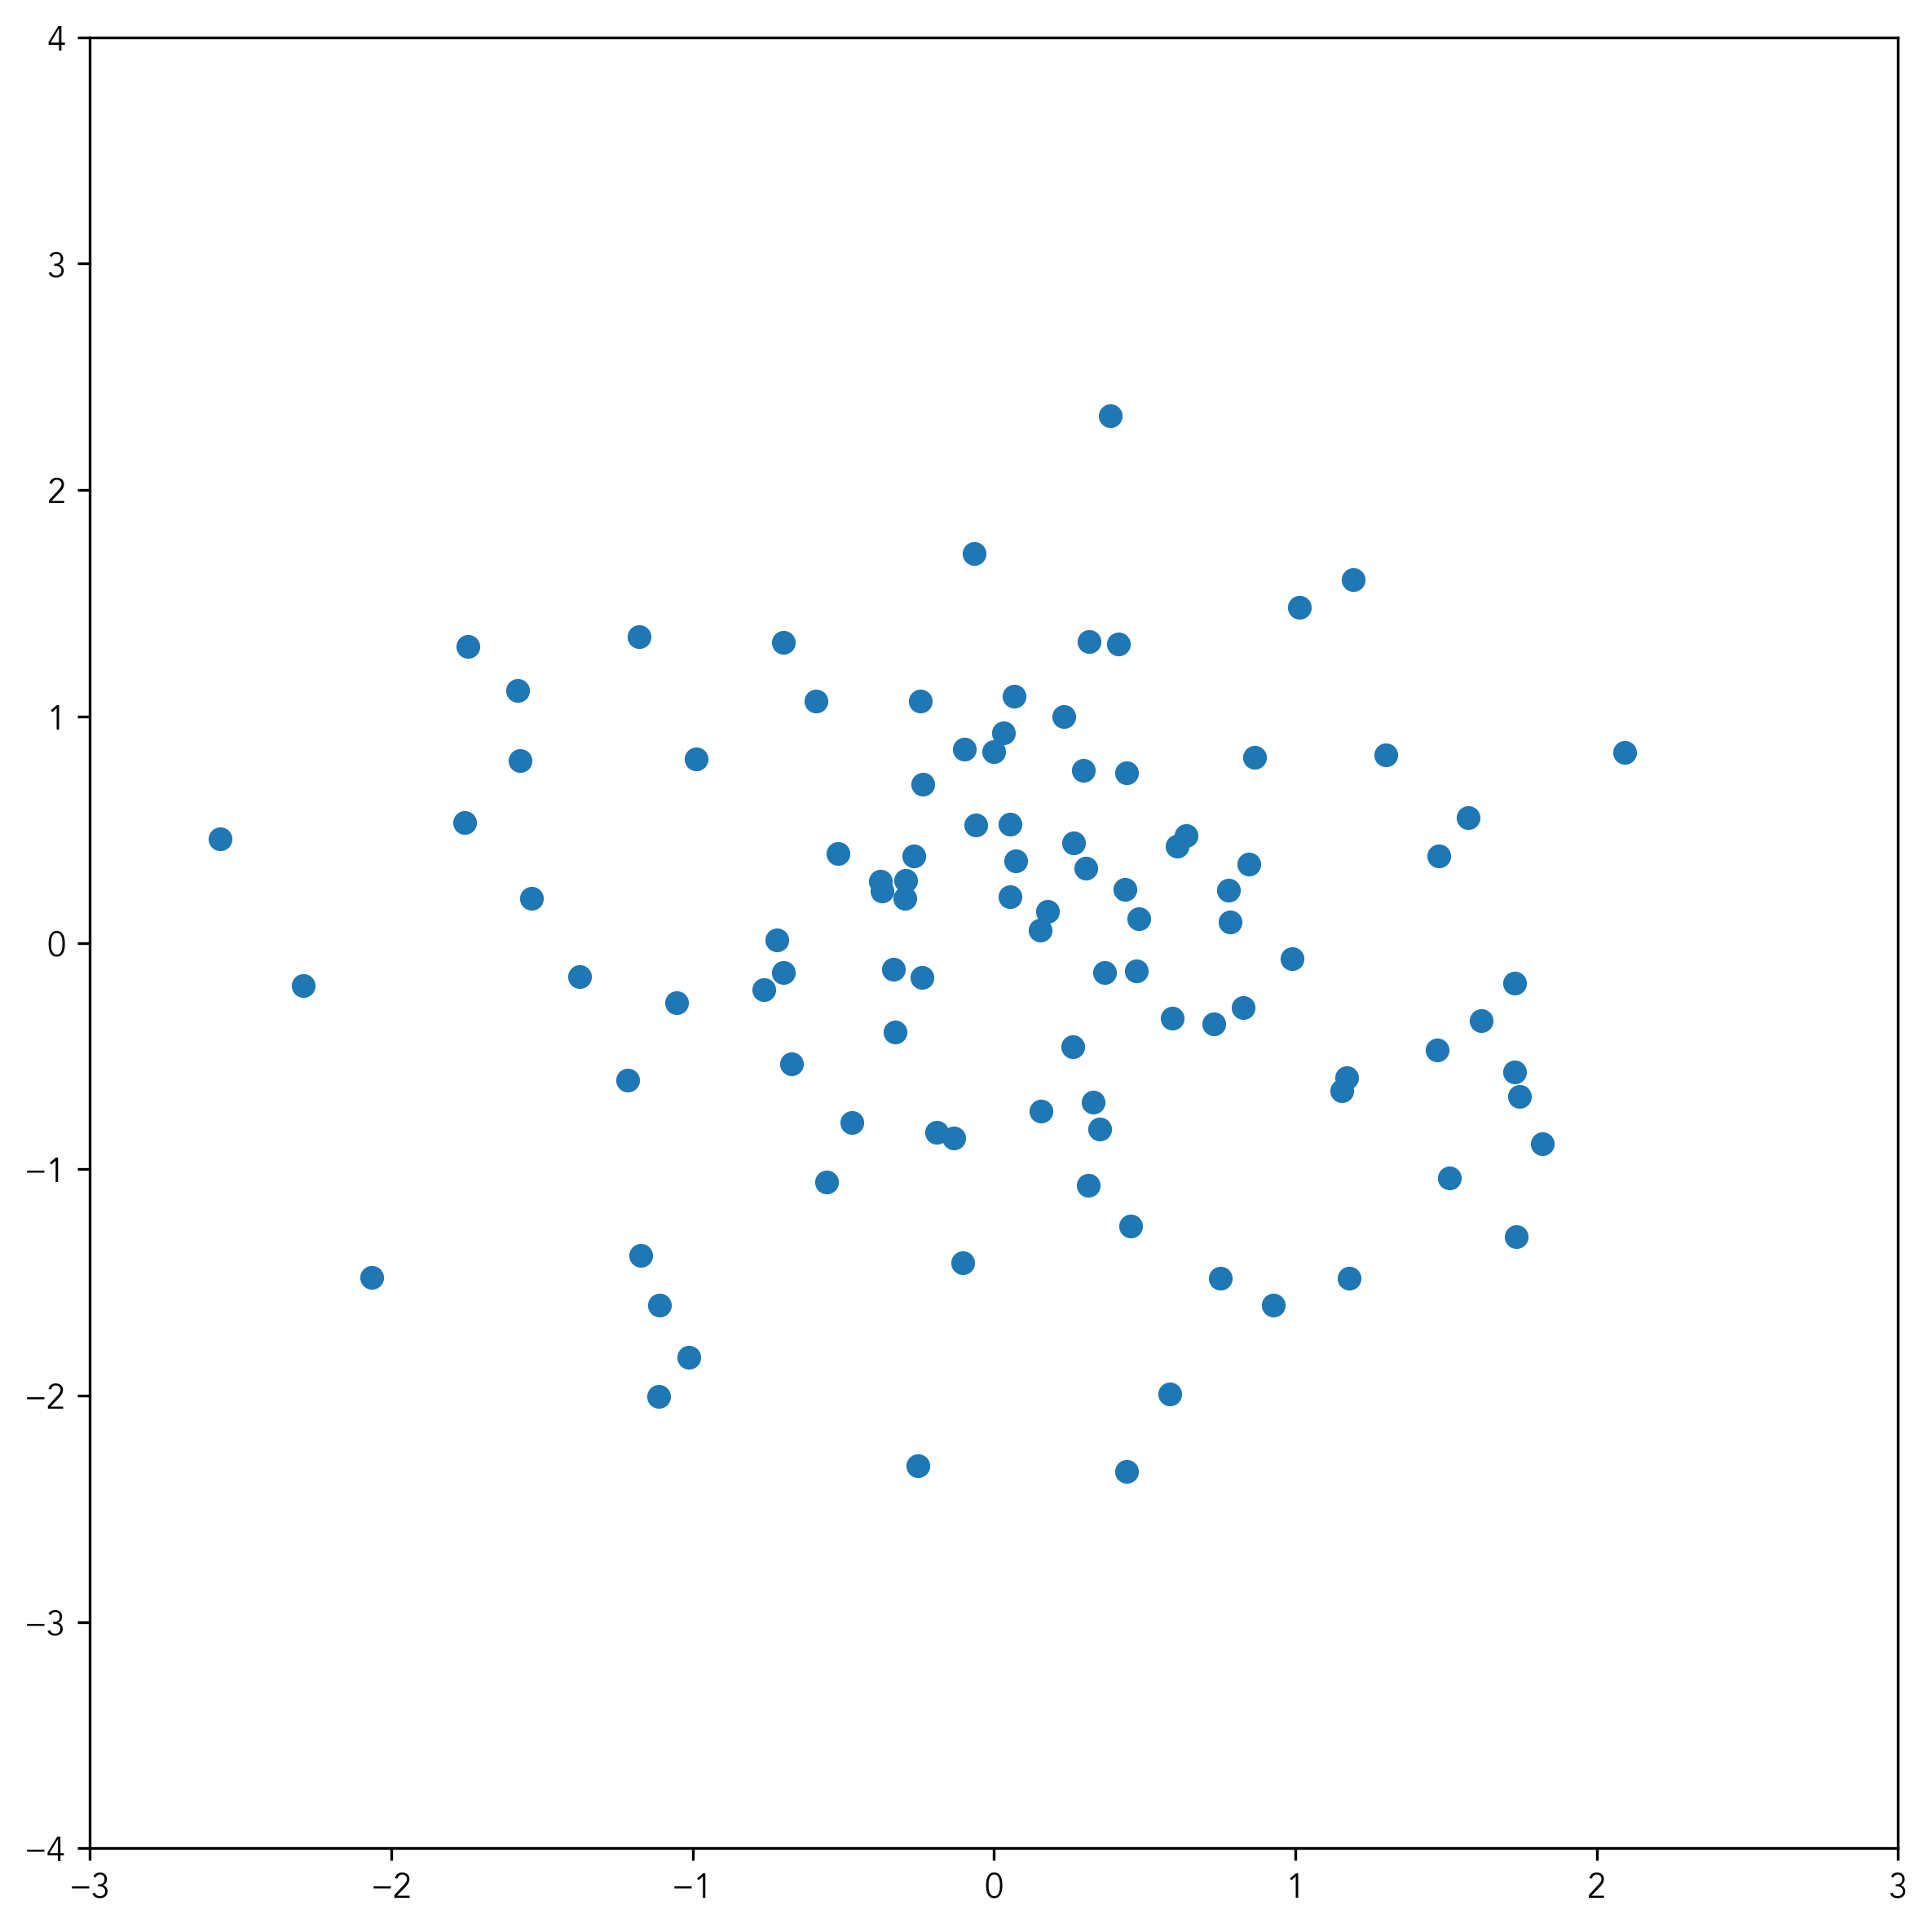

In [27]:
fig, ax = plt.subplots(figsize=(8, 8))
x = rng.standard_normal(size=100)
y = rng.standard_normal(size=100)
ax.scatter(x, y, marker='o')
ax.set_xlim([-3, 3])
ax.set_ylim([-4, 4])
fig.tight_layout()

In [28]:
fig.savefig('Test Plot.png',  **IMG_EXPORT_CONFIG)
fig.savefig('Test Plot.pdf', **IMG_EXPORT_CONFIG)

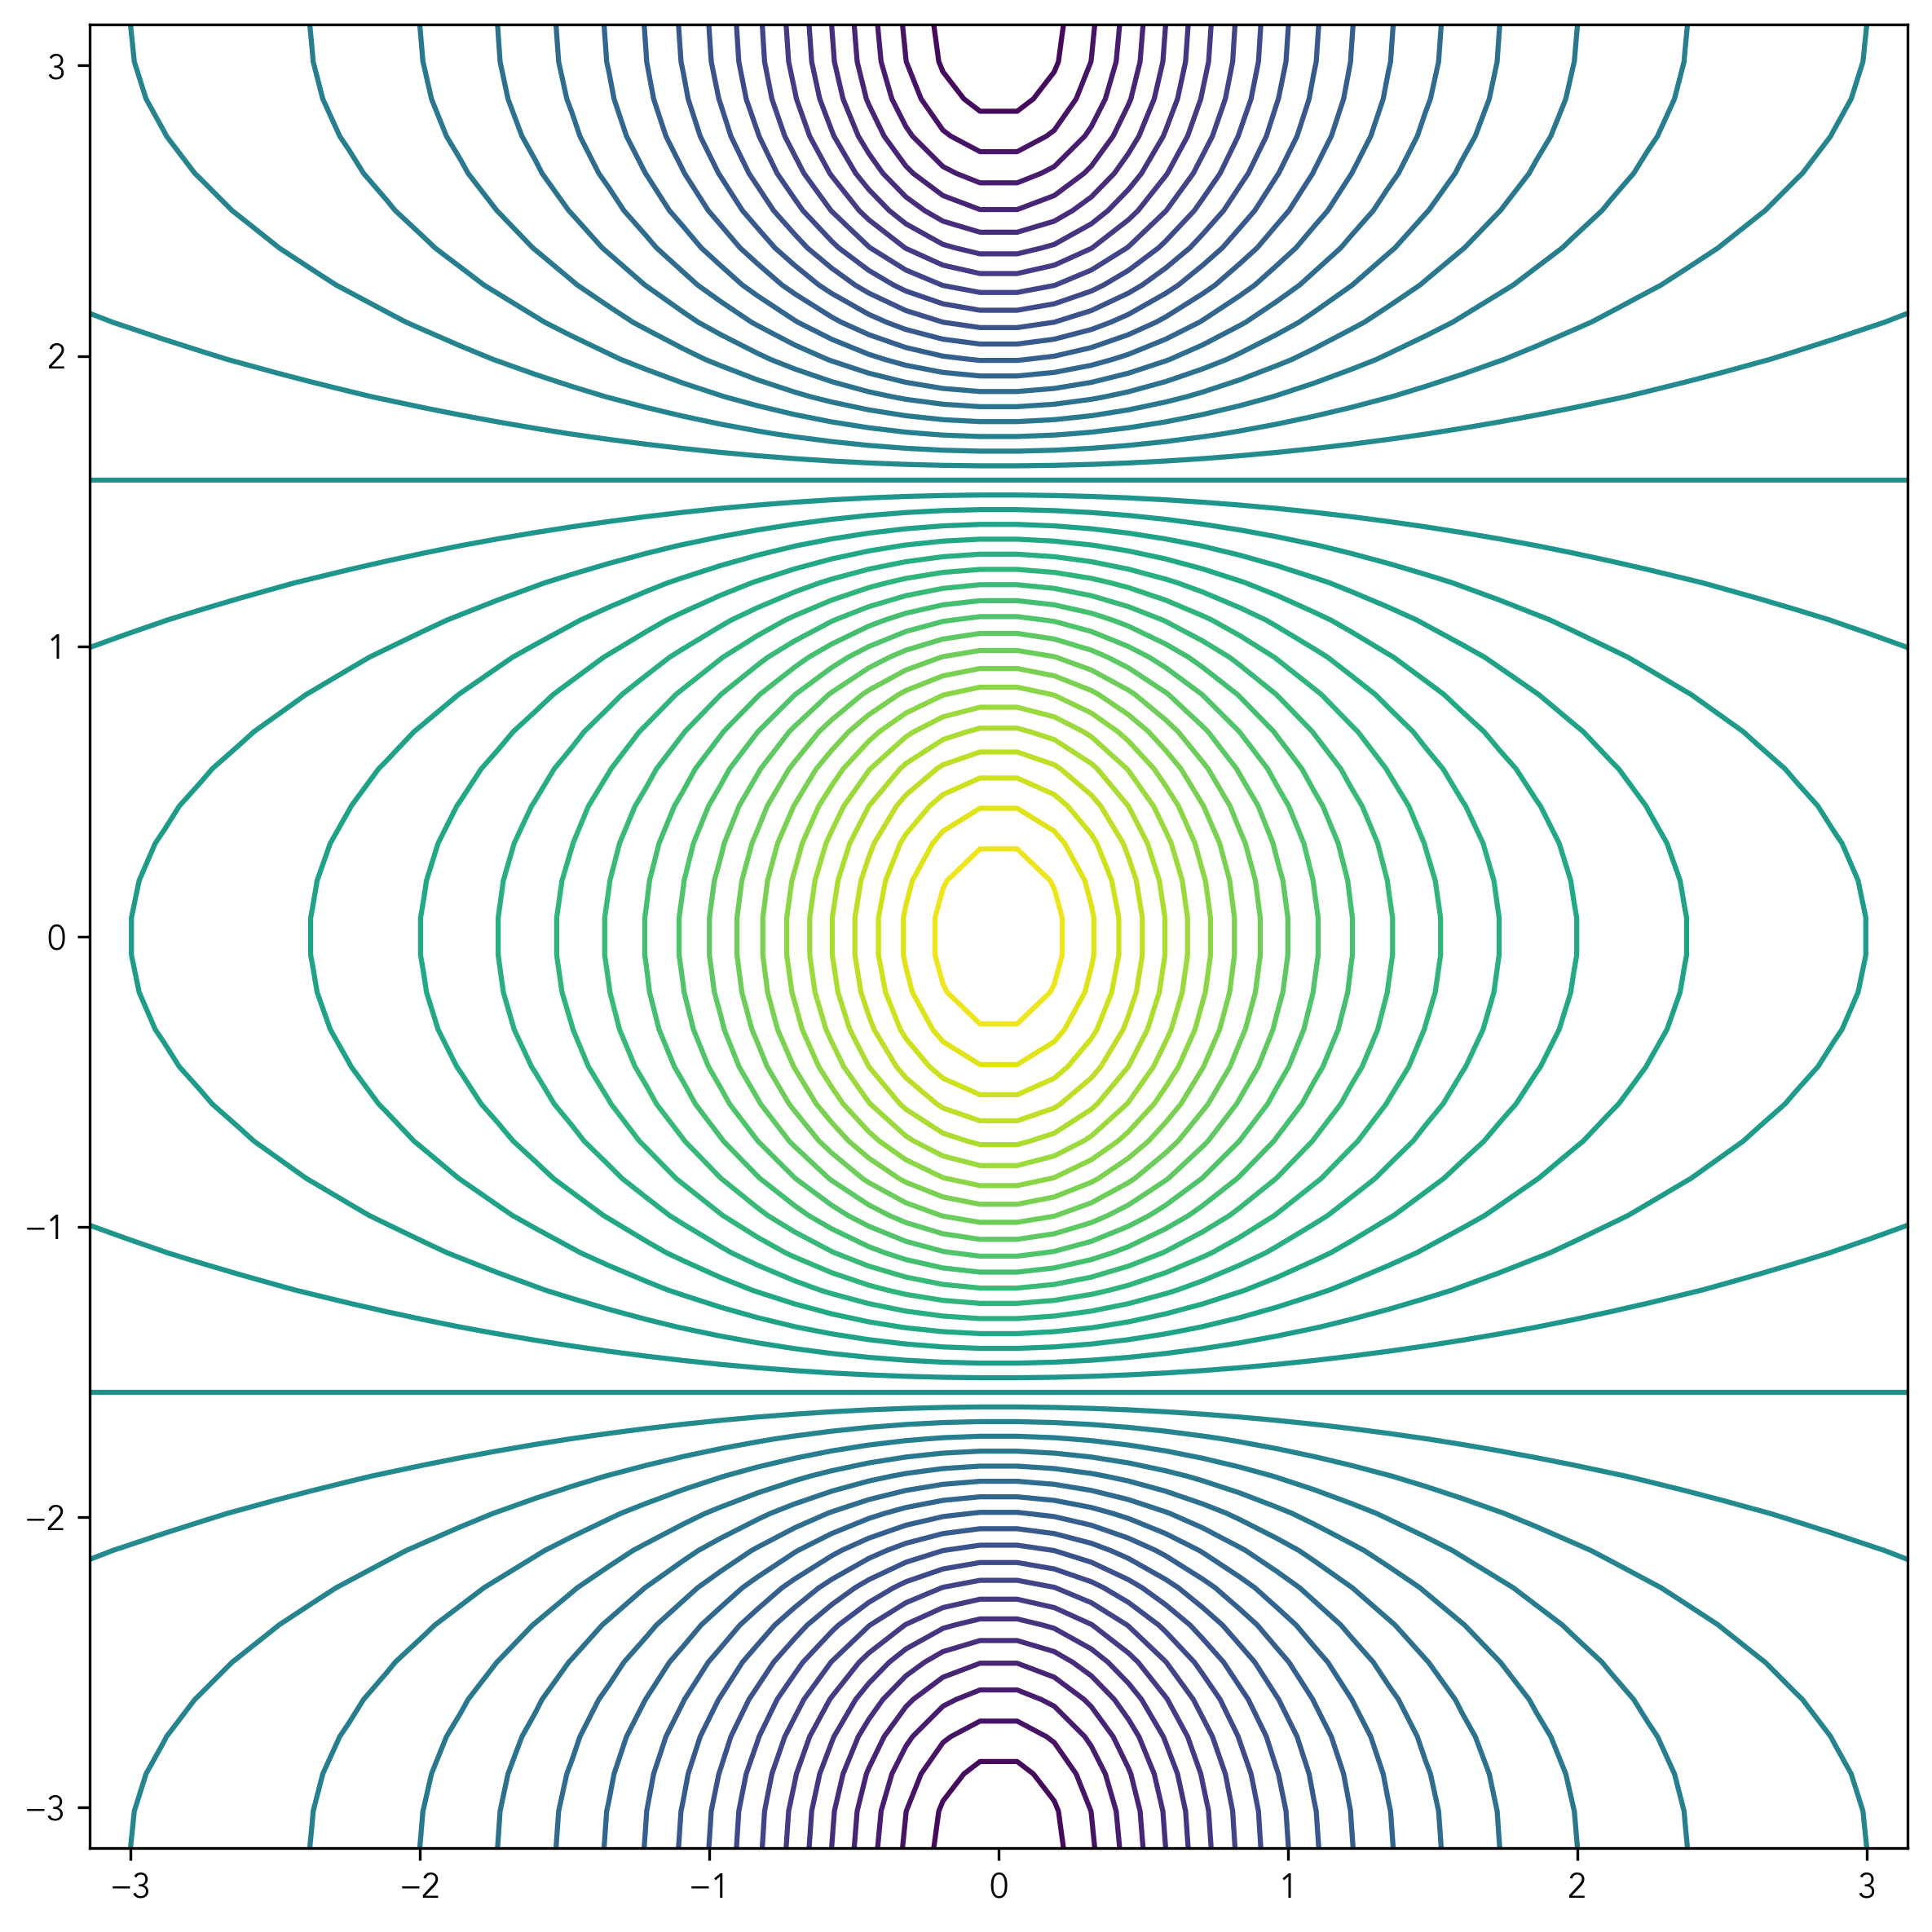

In [29]:
x = np.linspace(-np.pi, np.pi, 50)
y = x
f = np.multiply.outer(np.cos(y), 1 / (1 + x**2))

fig, ax = plt.subplots(figsize=(8, 8))
ax.contour(x, y, f, levels=45)
fig.tight_layout()

# Applied

## Import

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
plt.rcParams['font.family'] = 'Avenir'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.size'] = 10
plt.rcParams['figure.dpi'] = 300

In [32]:
IMG_EXPORT_CONFIG = {
    'dpi': 500,
    'bbox_inches': 'tight',
    'pad_inches': 0.15,
}

In [33]:
sns.set_theme(style='whitegrid')
sns.set_palette('hls', 8)

## Code

### Exercise 8 / 65,66

(a) Use the `pd.read_csv()` function to read the data into Python. Call the loaded data `college`. Make sure that you have the directory set to the correct location for the data.

In [34]:
college_df = pd.read_csv('data/College.csv')
college_df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


---

(b) Look at the data used in the notebook by creating and running a new cell with just the code `college` in it. You should notice that the first column is just the name of each university in a column named something like `Unnamed: 0`.

```python
college2 = pd.read_csv('College.csv', index_col=0)
college3 = college.rename({'Unnamed: 0': 'College'}, axis=1)
college3 = college3.set_index('College')
```

In [35]:
college2_df = pd.read_csv('data/College.csv', index_col=0)
college2_df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [36]:
college3_df = college_df.rename({'Unnamed: 0': 'College'}, axis=1)
college3_df = college3_df.set_index('College')
college3_df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [37]:
college_df = college3_df

---

(c) Use the `describe()` method of to produce a numerical summary of the variables in the data set.

In [38]:
college_df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


---

(d) Use the `pd.plotting.scatter_matrix()` function to produce a scatterplot matrix of the first columns `[Top10perc, Apps, Enroll]`. Recall that you can reference a list `C` of columns of a data frame `A` using `A[C]`.

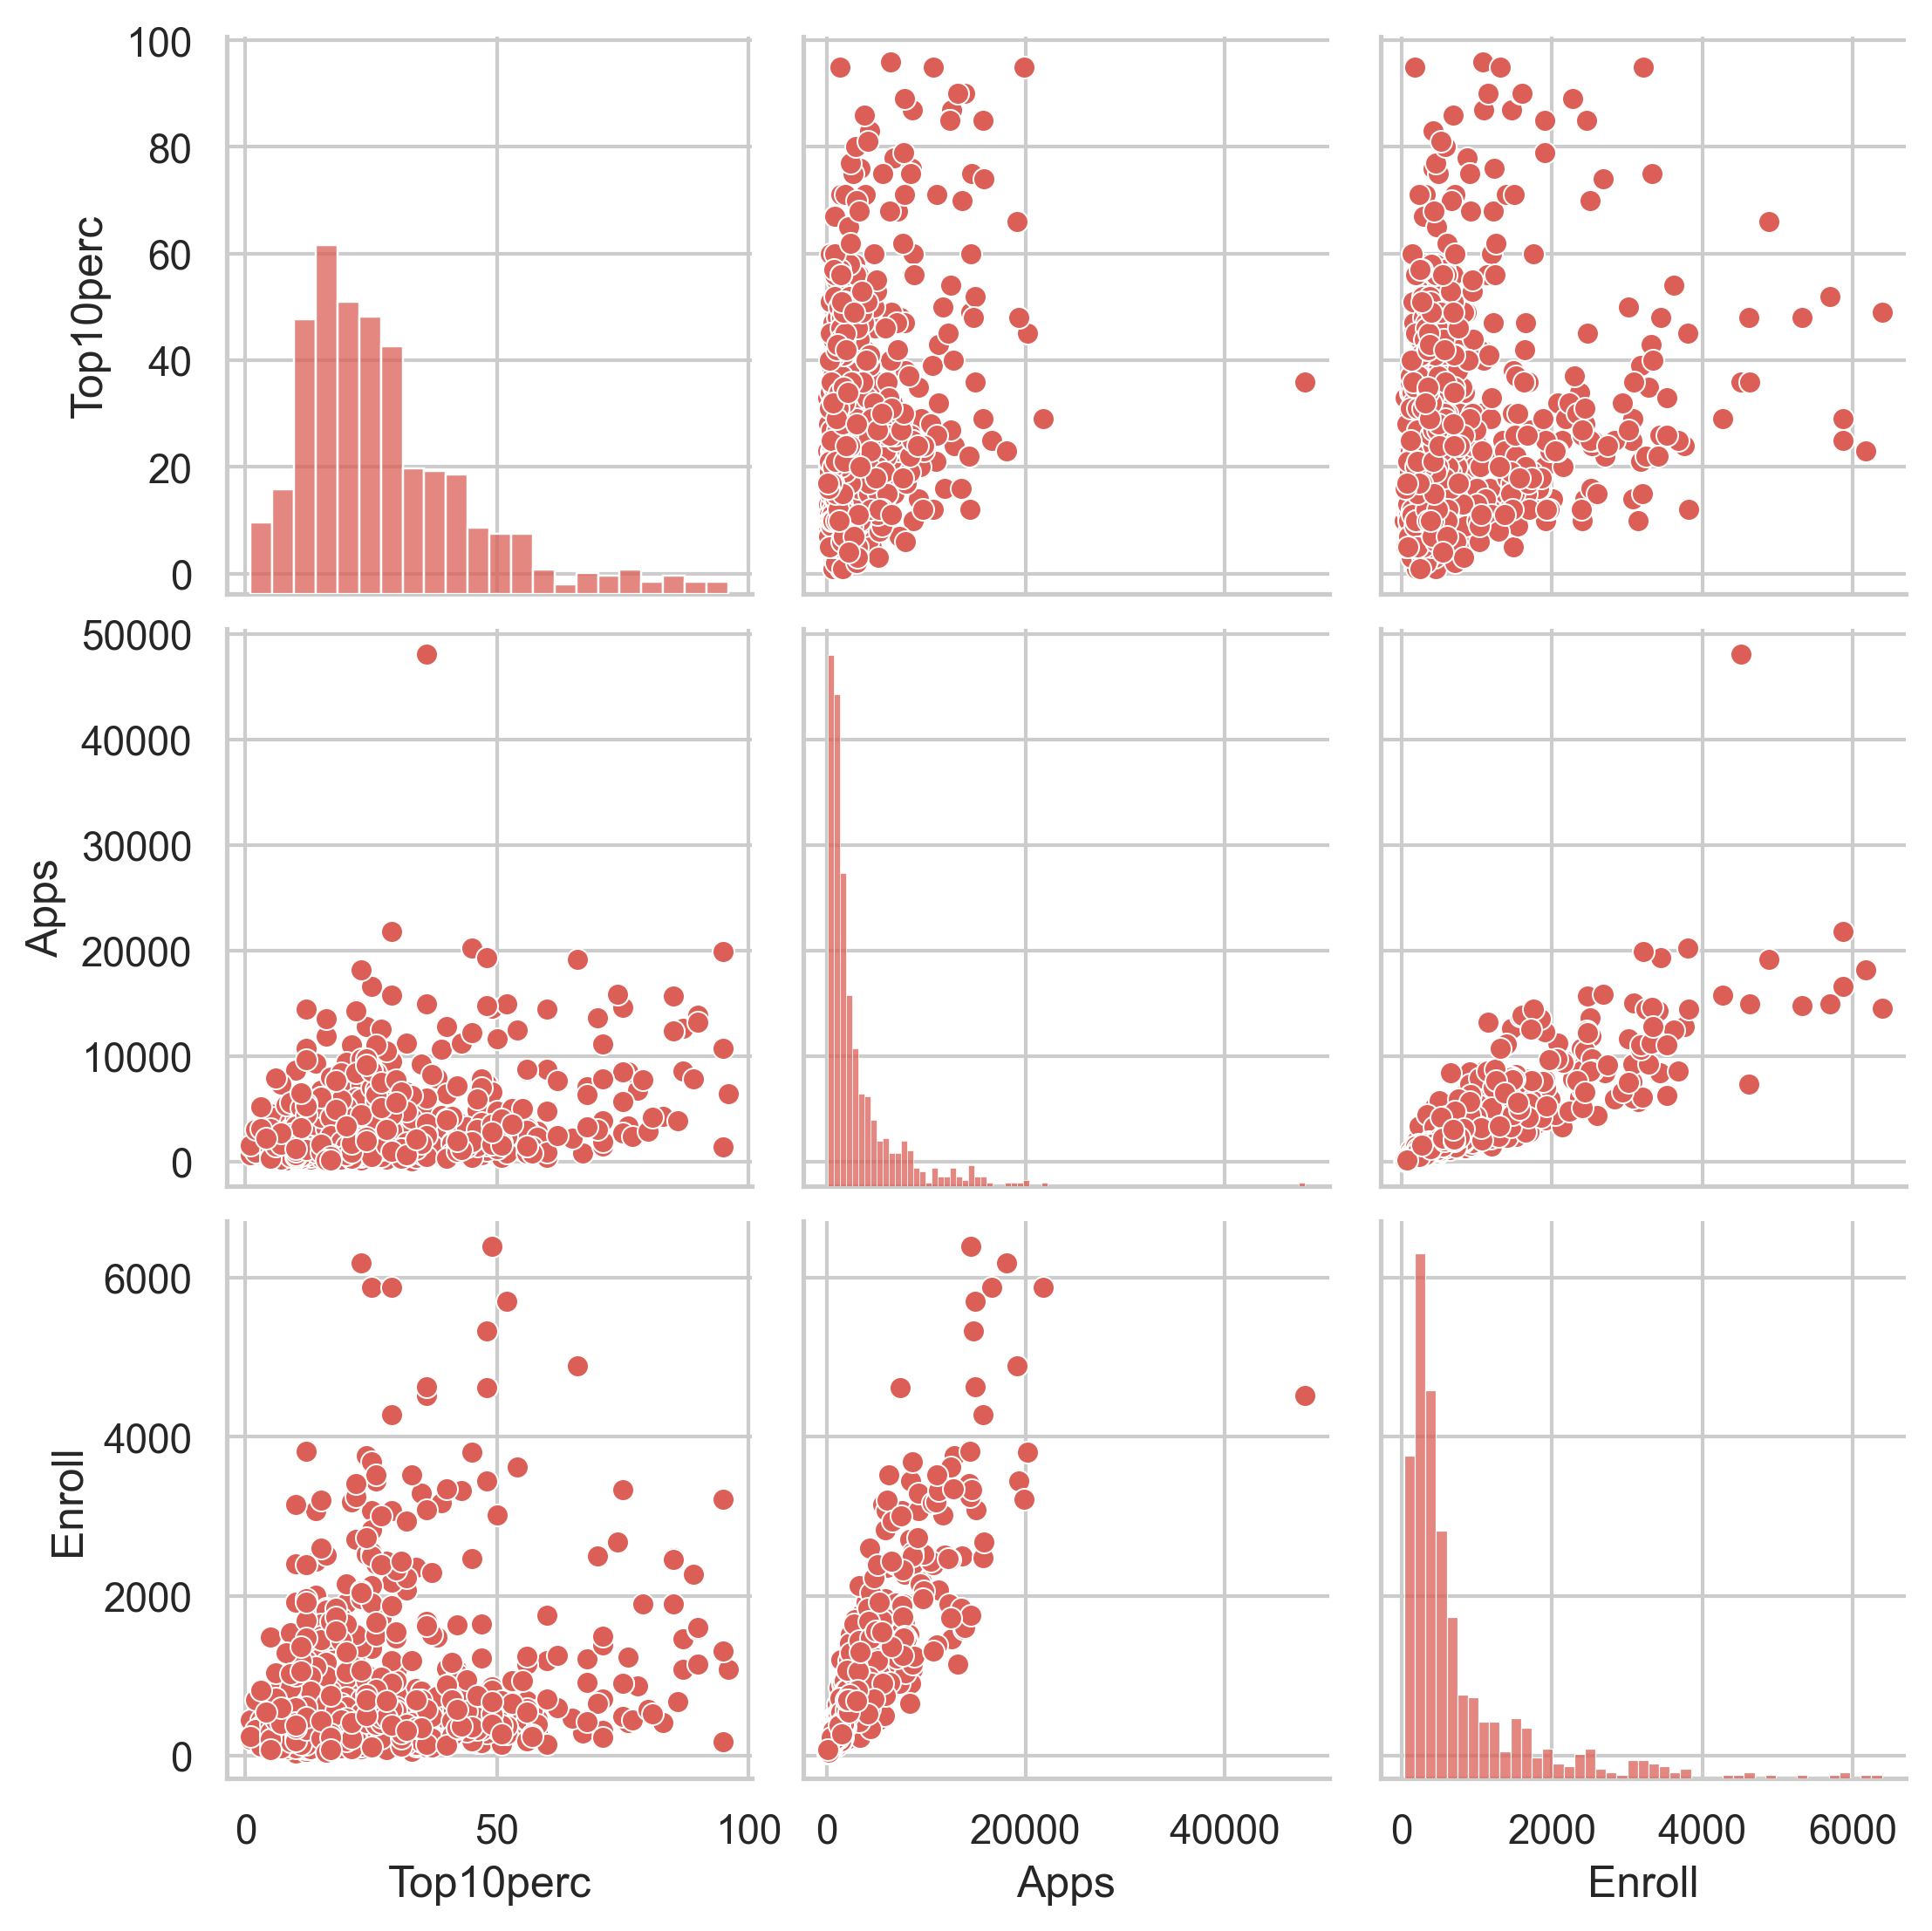

In [39]:
# fig, ax = plt.subplots(3, 3)
# pd.plotting.scatter_matrix(college[['Top10perc', 'Apps', 'Enroll']], ax=ax)
# fig.tight_layout()

sns.pairplot(data=college_df[['Top10perc', 'Apps', 'Enroll']])

---

(e) Use the `boxplot()` method of `college` to produce side-by-side boxplots of `Outstate` versus `Private`.

In [40]:
college_df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


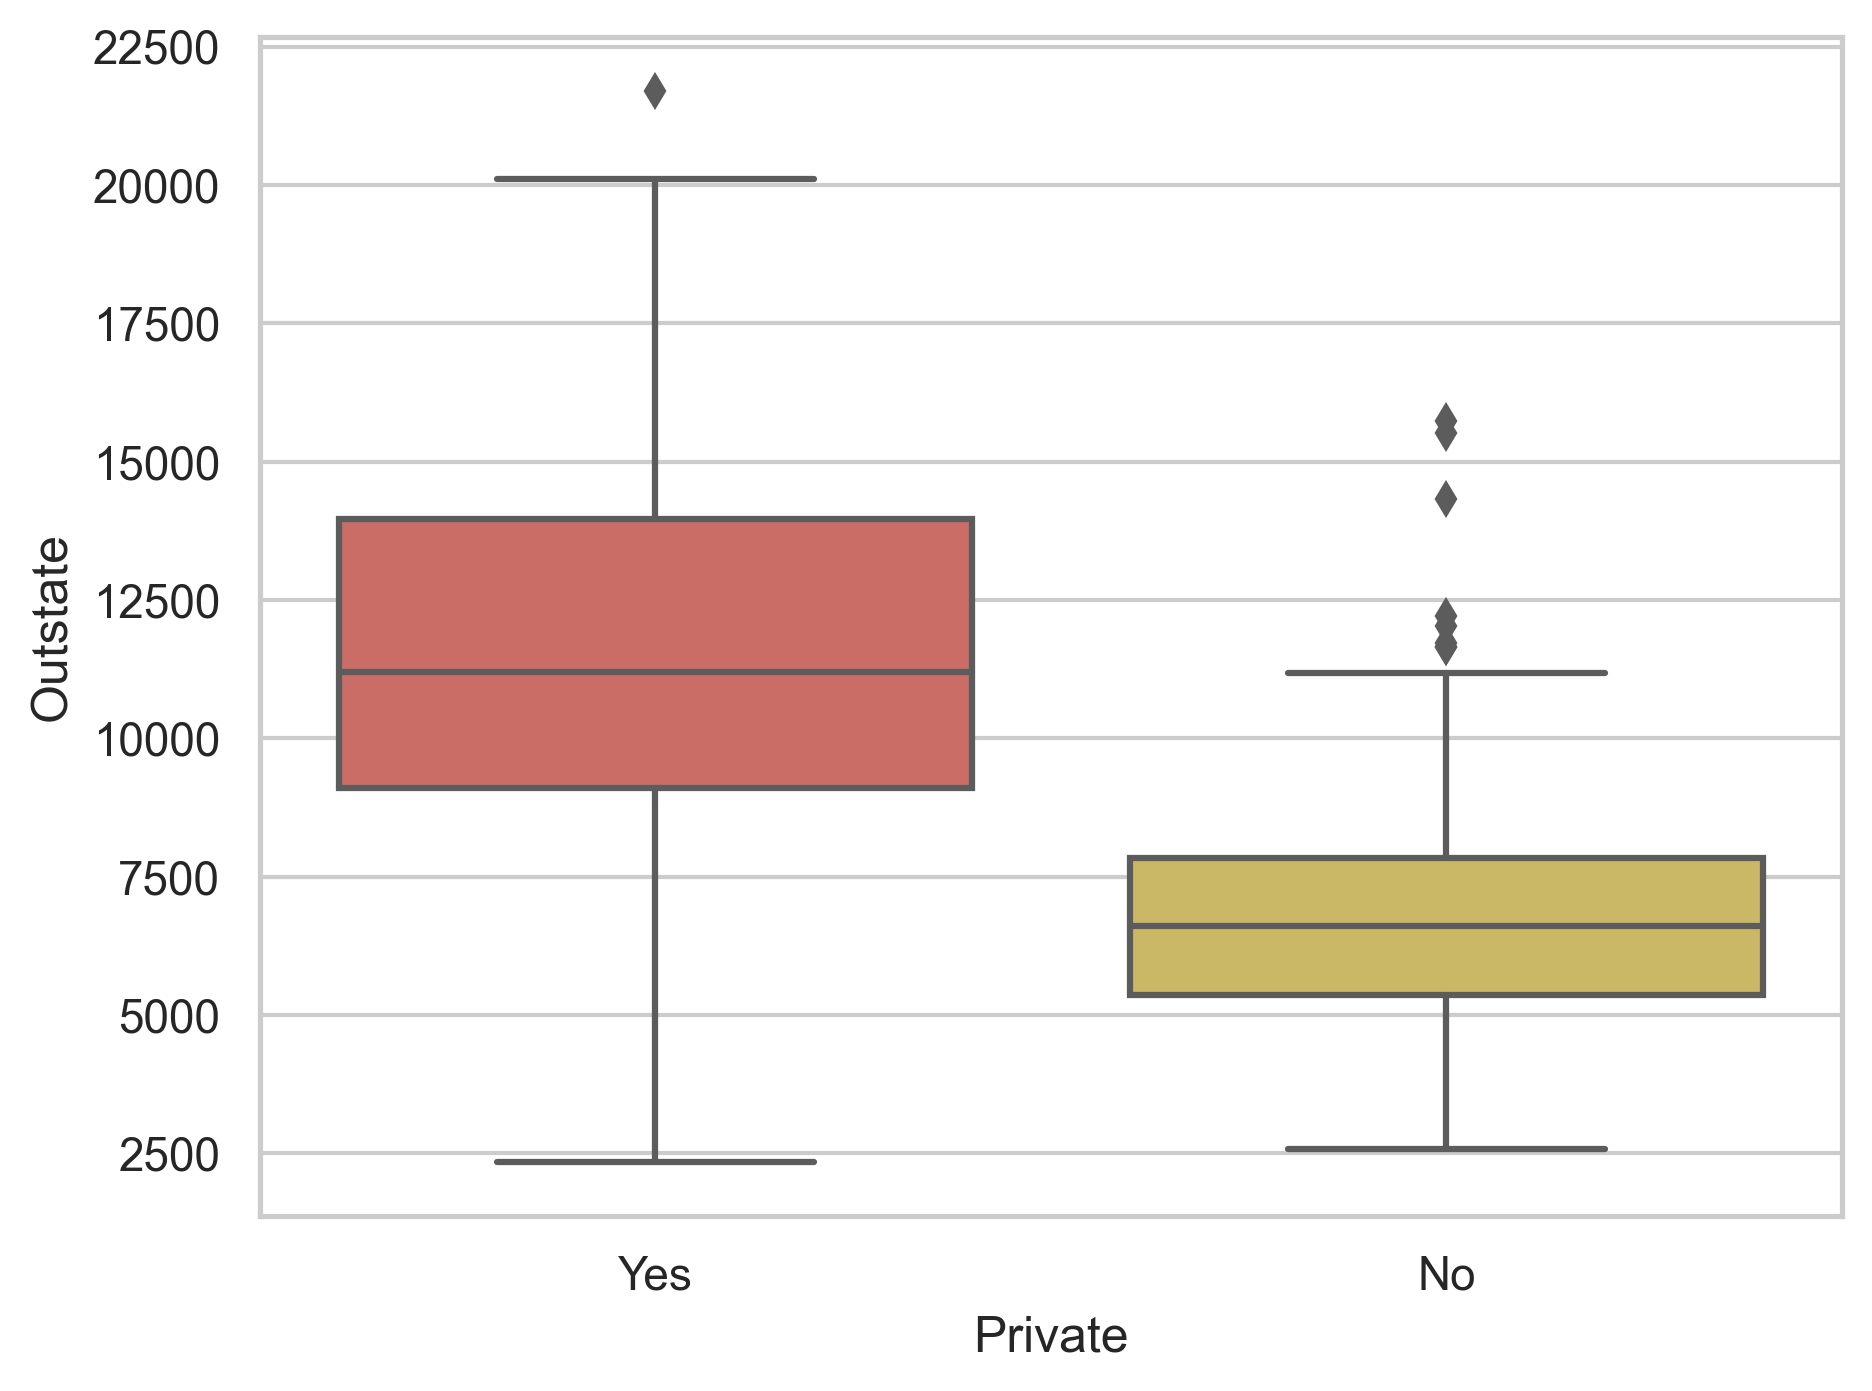

In [41]:
fig, ax = plt.subplots()
sns.boxplot(ax=ax, x='Private', y='Outstate', data=college_df)
fig.tight_layout()

---

(f) Create a new qualitative variable, called `Elite`, by *binning* the `Top10perc` variable into two groups based on whether or not the proportion of students coming from the top 10% of their high school classes exceeds 50%.

In [42]:
college_df['Elite'] = 'No'
college_df.loc[college_df['Top10perc'] > 50,'Elite'] = 'Yes'

Use the `value_counts()` method of `college['Elite']` to see how many elite universities there are. Finally, use the `boxplot()` method again to produce side-by-side boxplots of `Outstate` versus `Elite`.

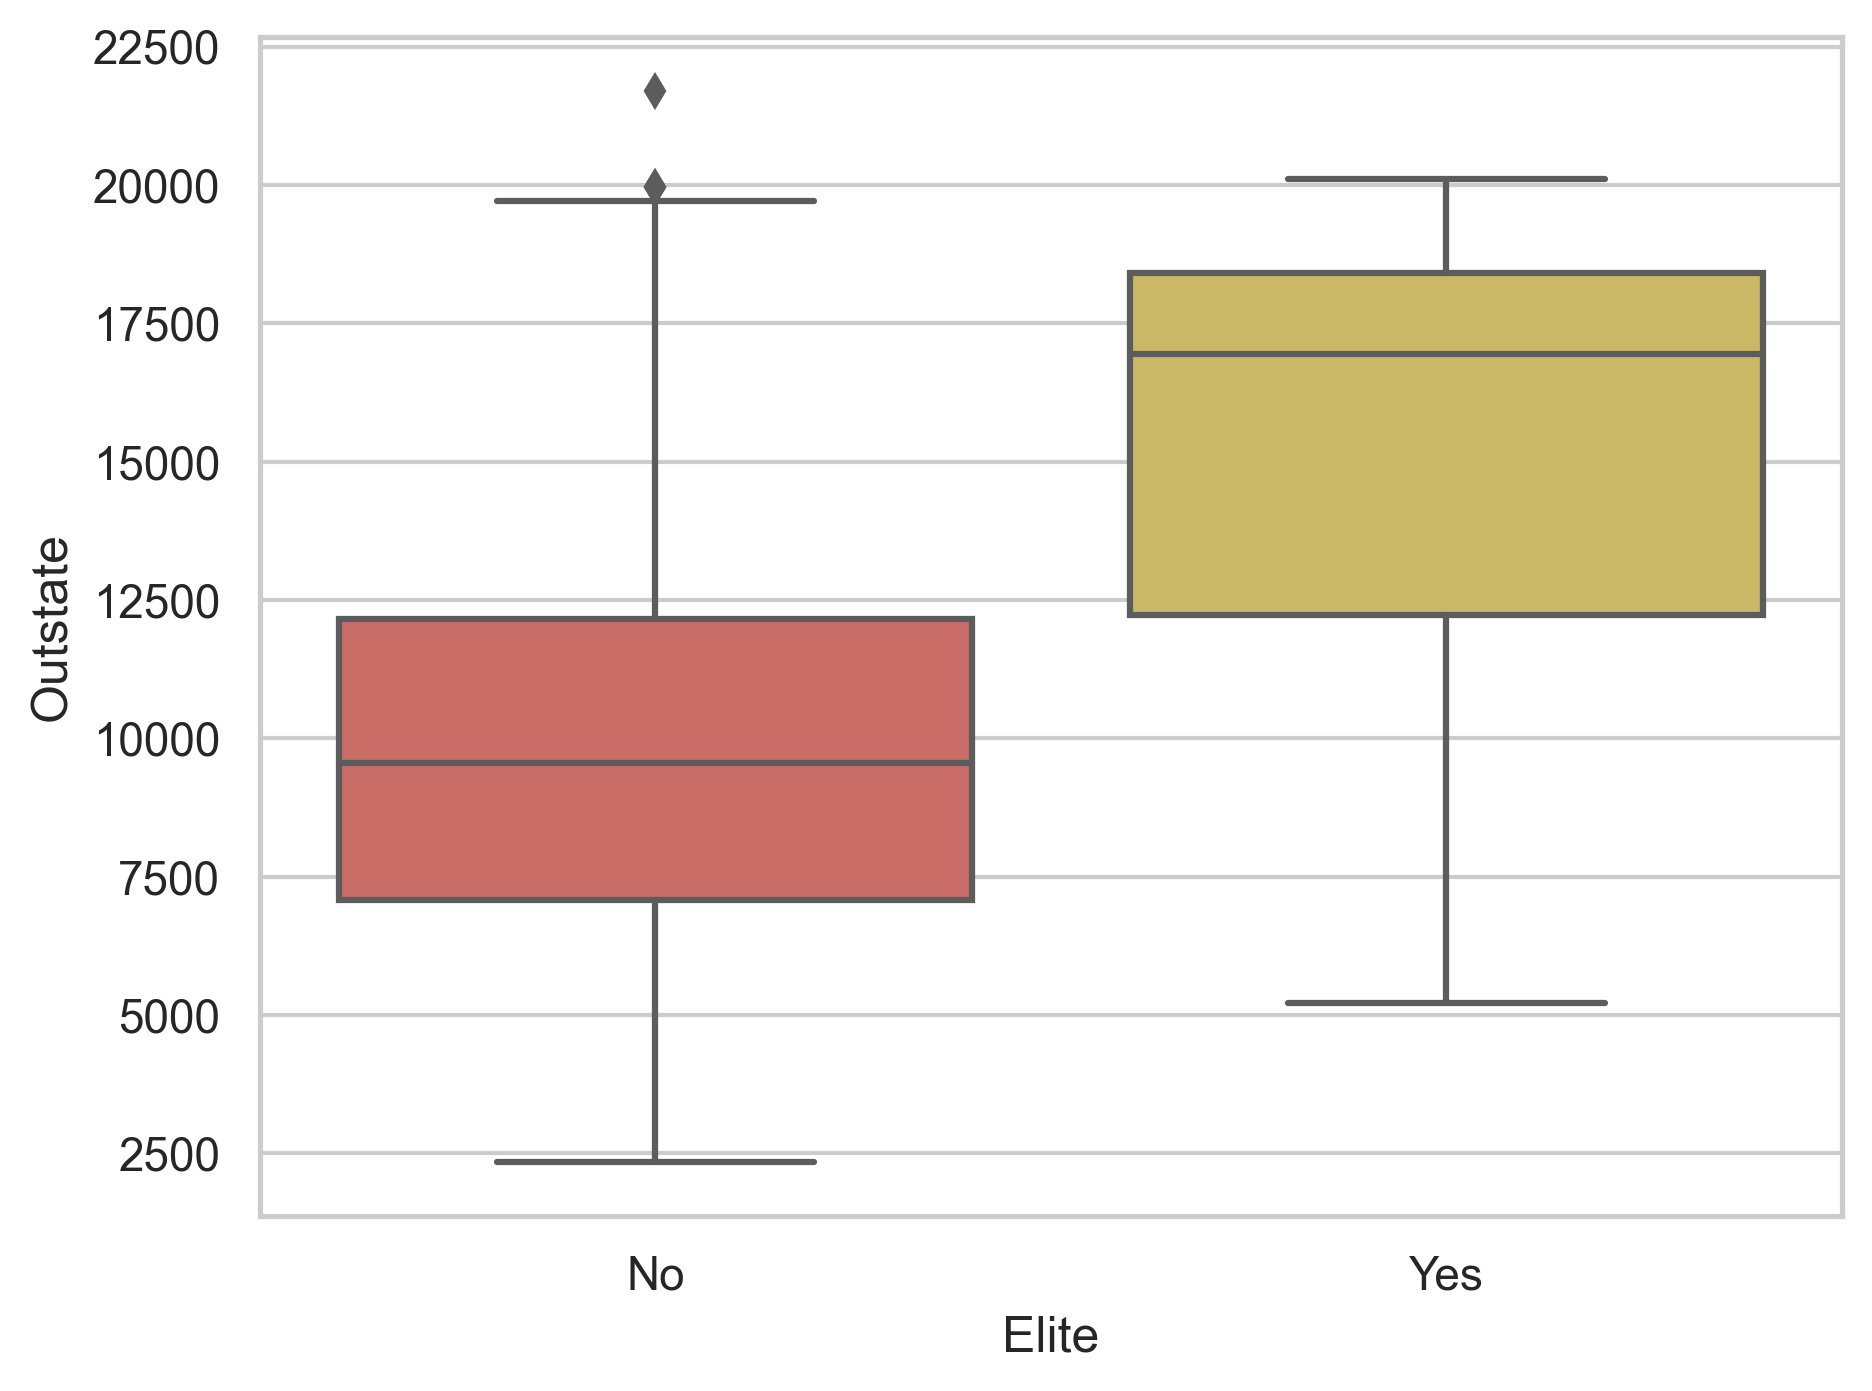

In [43]:
fig, ax = plt.subplots()
sns.boxplot(ax=ax, x='Elite', y='Outstate', data=college_df)
fig.tight_layout()

---

(g) Use the `plot.hist()` method of college to produce some histograms with differing numbers of bins for a few of the quantitative variables.

In [44]:
numeric_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
object_types = ['object']
quantitative = college_df.select_dtypes(include=numeric_types).columns
qualitative = college_df.select_dtypes(include=object_types).columns
print(f'Quantitative features: {str(quantitative.format())}')
print(f'Qualitative features: {str(qualitative.format())}')

Quantitative features: ['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate']
Qualitative features: ['Private', 'Elite']


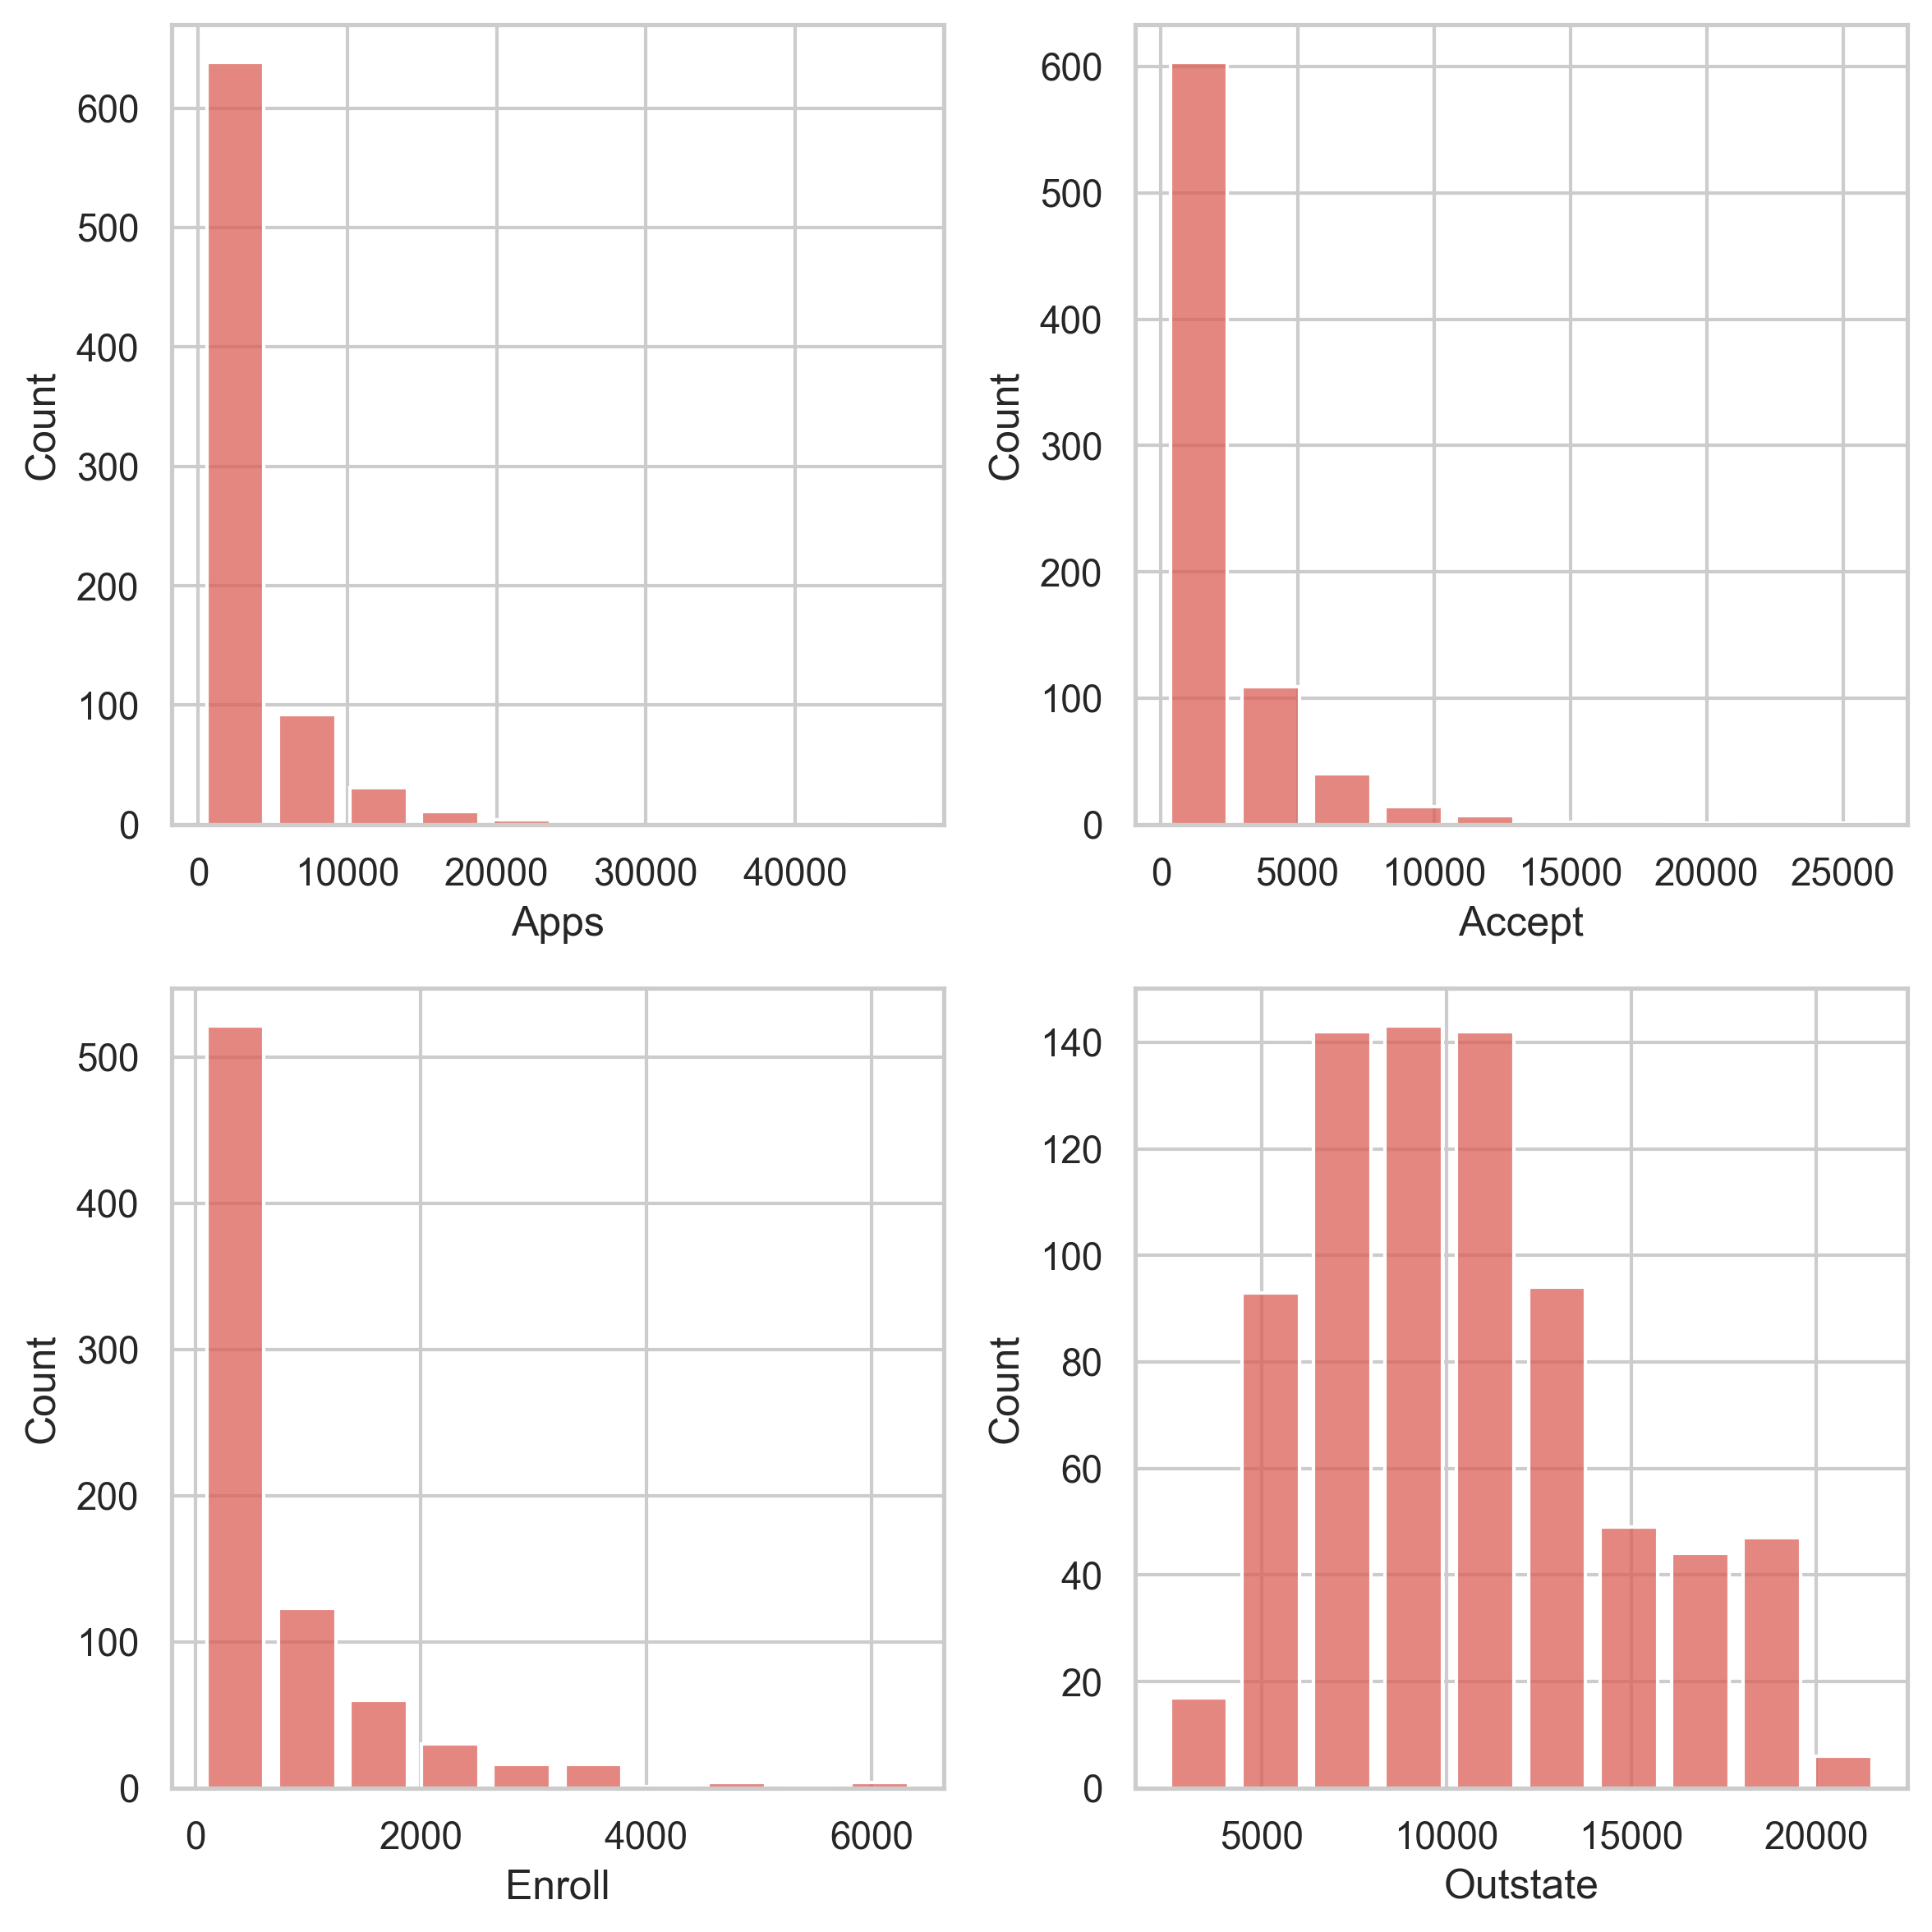

In [45]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
sns.histplot(x='Apps', data=college_df, bins=10, ax=axes[0, 0], shrink=0.8)
sns.histplot(x='Accept', data=college_df, bins=10, ax=axes[0, 1], shrink=0.8)
sns.histplot(x='Enroll', data=college_df, bins=10, ax=axes[1, 0], shrink=0.8)
sns.histplot(x='Outstate', data=college_df, bins=10, ax=axes[1, 1], shrink=0.8)
fig.tight_layout()

### Exercise 9 / 66,67

(a) Which of the predictors are quantitative, and which are qualitative?

In [46]:
auto_df = pd.read_csv('data/Auto.csv')
first_column = auto_df.pop('name')
auto_df.insert(0, 'name', first_column)
auto_df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [47]:
numeric_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
object_types = ['object']
quantitative = auto_df.select_dtypes(include=numeric_types).columns
qualitative = auto_df.select_dtypes(include=object_types).columns
print(f'Quantitative features: {str(quantitative.format())}')
print(f'Qualitative features: {str(qualitative.format())}')

Quantitative features: ['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'year', 'origin']
Qualitative features: ['name', 'horsepower']


---

(b) What is the range of each quantitative predictor? You can answer this using the `min()` and `max()` methods in `numpy`.

In [48]:
quantitative_df = auto_df[quantitative.values]
auto_min_max_df = pd.DataFrame({
    'min': quantitative_df.min(),
    'max': quantitative_df.max(),
})
auto_min_max_df

,min,max
mpg,9.0,46.6
cylinders,3.0,8.0
displacement,68.0,455.0
weight,1613.0,5140.0
acceleration,8.0,24.8
year,70.0,82.0
origin,1.0,3.0


---

(c) What is the mean and standard deviation of each quantitative predictor?

In [49]:
auto_mean_std_df = pd.DataFrame({
    'mean': quantitative_df.mean(),
    'std': quantitative_df.std(),
})
auto_mean_std_df

,mean,std
mpg,23.515869,7.825804
cylinders,5.458438,1.701577
displacement,193.532746,104.379583
weight,2970.261965,847.904119
acceleration,15.555668,2.749995
year,75.994962,3.690005
origin,1.574307,0.802549


---

(d) Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?

In [50]:
auto_dropped_df = auto_df.drop(auto_df.index[10:86])
auto_dropped_quantitative_df = auto_dropped_df[quantitative.values]
auto_dropped_mean_std_df = pd.DataFrame({
    'min': auto_dropped_quantitative_df.min(),
    'max': auto_dropped_quantitative_df.max(),
    'mean': auto_dropped_quantitative_df.mean(),
    'std': auto_dropped_quantitative_df.std(),
})
auto_dropped_mean_std_df

,min,max,mean,std
mpg,11.0,46.6,24.444860,7.899928
cylinders,3.0,8.0,5.370717,1.653486
displacement,68.0,455.0,187.174455,99.864568
weight,1649.0,4997.0,2933.183801,809.638650
acceleration,8.5,24.8,15.709034,2.706441
year,70.0,82.0,77.143302,3.128202
origin,1.0,3.0,1.598131,0.816163
